In [1]:
from readImages import readAll
images = readAll('Natural_Images/Resized', '.png')

float32


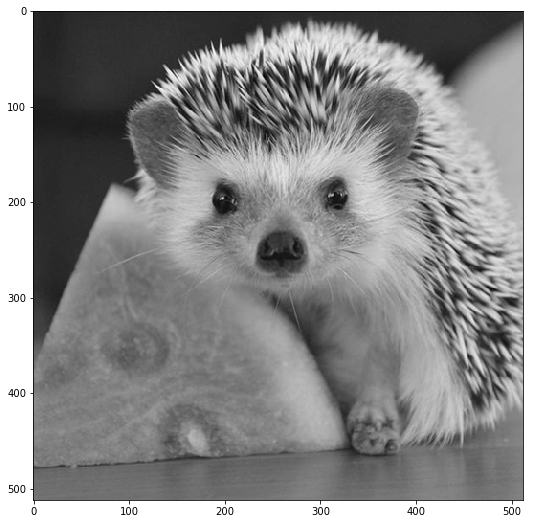

In [2]:
import matplotlib.pyplot as plt
from scipy import misc
%matplotlib inline

plt.rcParams['figure.figsize'] = [16, 9]

plt.imshow(images[3], cmap='gray')

test_image = misc.imread('Natural_Images/Resized/hedgehog2.png', mode='F')
print(test_image.dtype)

In [17]:
from ICA import train_ICA, ICA_decompose
block_size = 8

basis, train, px, py = train_ICA(images, block_size, num_samples=3200)

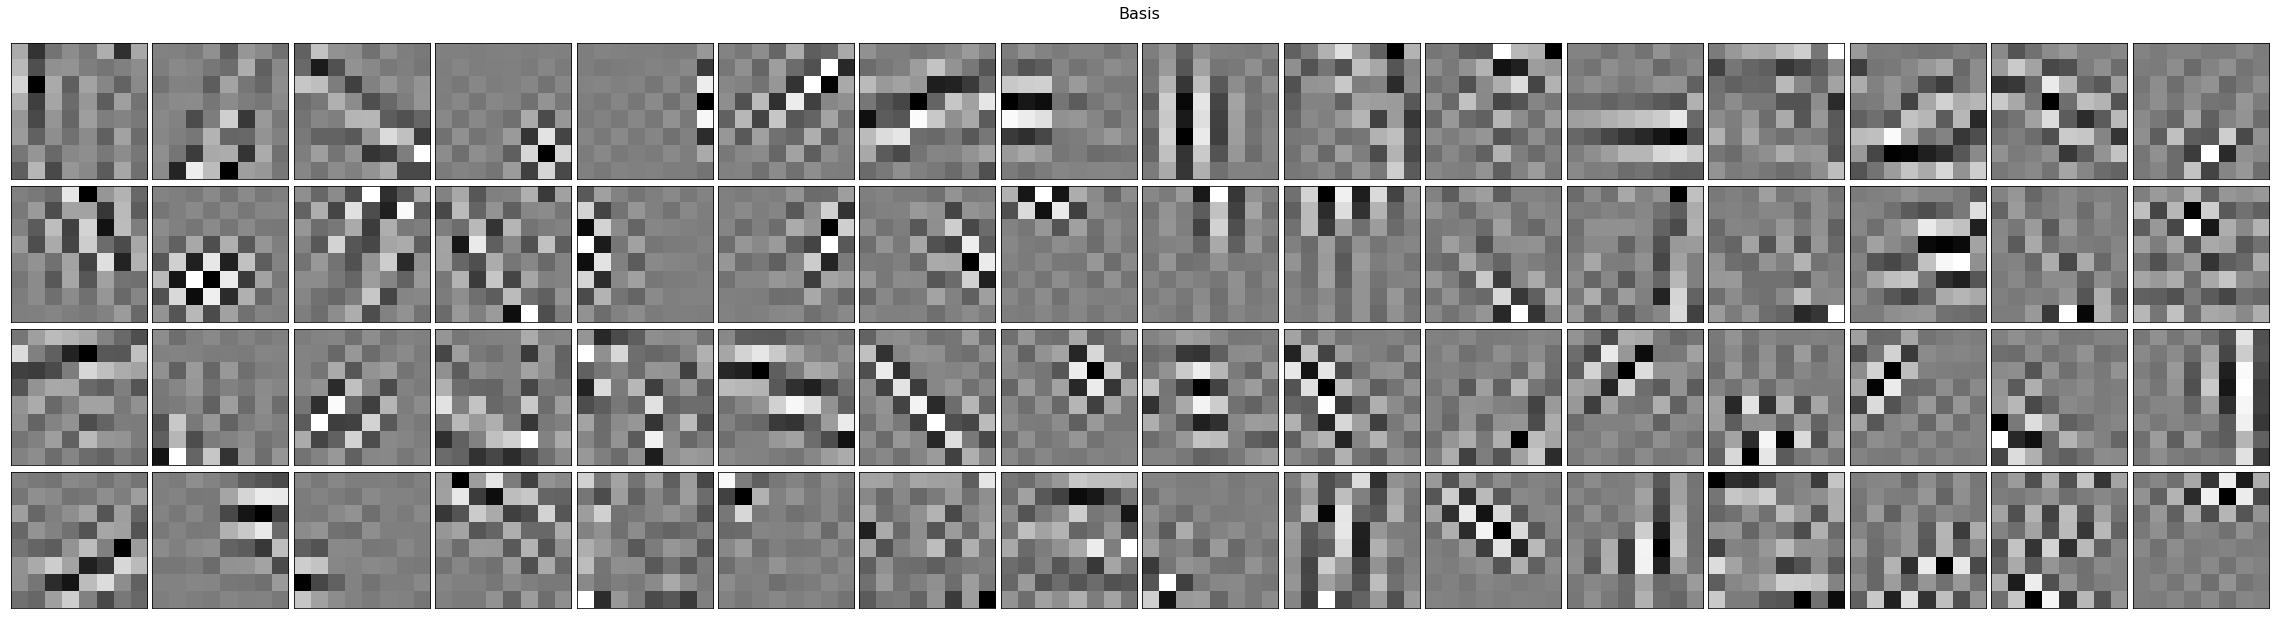

In [18]:
from ICA import plot_gallery
plot_gallery('Basis', basis, n_col=16, n_row=block_size ** 2 / 16, image_shape=(block_size,block_size))

In [25]:
decomposition, intercept, iterations = ICA_decompose(images[3], block_size, basis, 300)

In [26]:
from ICA import reconstruct
reconstructed_image = reconstruct(decomposition, intercept, basis, block_size, images[3].shape)

In [27]:
print(len(decomposition))

4096


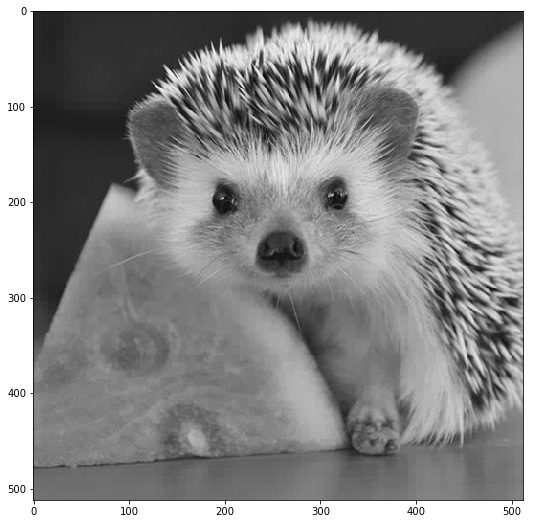

29.962890625


In [28]:
import numpy as np
plt.imshow(reconstructed_image, cmap='gray')
plt.show()
print(np.mean(iterations))

In [29]:
from scipy.sparse import lil_matrix
block_coeff = []
for dec in decomposition:
    block_coeff.append(dec)
    
block_coeff_sparse = lil_matrix(block_coeff)
bccsr = block_coeff_sparse.tocsr()

In [33]:
print(images[3].nbytes)
print(bccsr.data.nbytes + bccsr.indptr.nbytes + bccsr.indices.nbytes)
print(1.*(bccsr.data.nbytes + bccsr.indptr.nbytes + bccsr.indices.nbytes)/(images[3].nbytes))
print(images[3].dtype)
print(bccsr)

2097152
1489124
0.710069656372
float64
  (0, 52)	8763.68155579
  (1, 9)	-2708.14505569
  (2, 28)	2234.85063158
  (3, 9)	-2554.61969488
  (4, 52)	-7380.61942112
  (5, 52)	-6811.92164008
  (6, 33)	-1051.4394164
  (7, 52)	-4089.50949686
  (8, 54)	-2742.38310166
  (9, 8)	-682.036830146
  (10, 9)	2985.1955831
  (11, 12)	2199.56213258
  (12, 54)	-4952.14836149
  (13, 52)	-5888.14768383
  (14, 54)	-3661.57821953
  (15, 47)	611.665495237
  (16, 28)	3993.22002465
  (17, 42)	2202.65047556
  (18, 9)	3131.42068718
  (19, 47)	1318.48390178
  (20, 52)	-5870.20089896
  (21, 0)	737.085226076
  (22, 47)	1220.9618334
  (23, 12)	3147.59327174
  (24, 47)	-2077.73691698
  :	:
  (4079, 60)	5555.60938574
  (4080, 12)	-6525.21054016
  (4080, 52)	-10468.0042591
  (4081, 52)	-14094.2600113
  (4082, 12)	-5511.43098735
  (4083, 6)	-3150.32956139
  (4084, 12)	3898.82771325
  (4085, 35)	-5962.8876735
  (4086, 52)	-4298.03112841
  (4087, 52)	8715.68385028
  (4088, 24)	-2433.0206943
  (4088, 28)	-6807.04292717
  (408